In [ ]:
import tensorflow as tf
print(tf.__version__)

import numpy as np

# from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import matplotlib.pyplot as plt

import csv
import time
import pandas as pd


2.3.0


In [ ]:
data_csv=pd.read_csv('Data_fire_theft.csv')


In [ ]:
data_csv


In [ ]:
Data=data_csv.to_numpy()
Data.shape

(42, 2)

In [ ]:
Data[0:5,:]

array([[ 6.2, 29. ],
       [ 9.5, 44. ],
       [10.5, 36. ],
       [ 7.7, 37. ],
       [ 8.6, 53. ]])

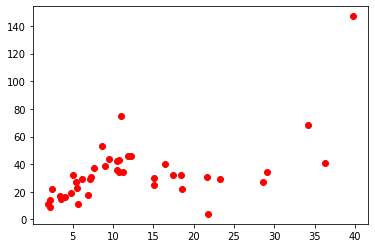

In [ ]:
plt.plot(Data[:,0], Data[:,1], 'ro', label='Original data')

plt.show()

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(4,trainable=True,dtype=np.float64,name='w')
    self.b = tf.Variable(2,trainable=True,dtype=np.float64,name='bias')

  def call(self, x):
    y = self.w*x+self.b
    return y


In [ ]:
model = MyModel()

In [ ]:
model.w.assign(4)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4.0>

In [ ]:
model([5])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([22.])>

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

In [ ]:
train_step([6.9],29)

loss istf.Tensor([0.36000046], shape=(1,), dtype=float64)


In [ ]:
[model.w.numpy(), model.b.numpy()]

[3.9255863437810996, 1.9255865114589488]

In [ ]:
train_step([6.9],29)

loss istf.Tensor([0.02138123], shape=(1,), dtype=float64)


In [ ]:
n_epochs=100
Data_len=Data.shape[0]
batch_size=20

w_list=[]
MSE_List=[]

In [ ]:
Data_len

42

In [ ]:
model = MyModel()

w_list=[]
MSE_List=[]

In [ ]:
def train_step(X, Y):
  with tf.GradientTape() as tape:
    Y_predicted = model(X)
    # loss = (tf.square (Y - Y_predicted))
    # print("loss is"+str(loss))
    loss = tf.math.reduce_mean(tf.square (Y - Y_predicted))
  # print("here1")
  # print( model.trainable_variables)
  gradients = tape.gradient(loss, model.trainable_variables)
  # print(gradients)
  # print("here2")
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  # print("here3")

In [ ]:
for epoch in range(n_epochs):
  np.random.shuffle(Data)
  for iter in range(int(Data_len/batch_size)):
    X_batch=[Data[iter*batch_size:(iter+1)*batch_size,0]]
    Y_batch=[Data[iter*batch_size:(iter+1)*batch_size,1]]
    train_step(X_batch,Y_batch)
    w_list.append(model.w.numpy())

    Y_hat=model([Data[:,0]])
    Train_MSE=np.mean((Data[:,1]-Y_hat)**2)
    # print(Train_MSE)
    MSE_List.append(Train_MSE)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



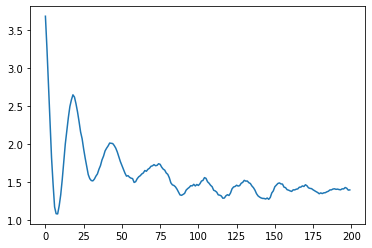

In [ ]:
plt.plot(w_list)


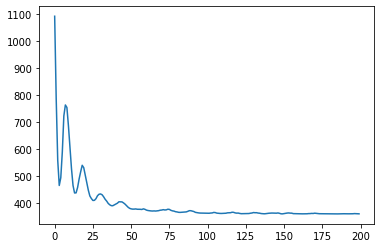

In [ ]:
plt.plot(MSE_List)


In [ ]:
MSE_List[-1]

361.4439304453682

In [ ]:
MSE_List[-1]

361.67940991781546

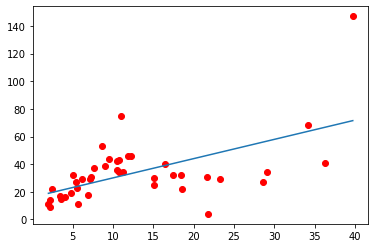

In [ ]:
plt.plot(Data[:,0], Data[:,1], 'ro', label='Original data')

predicted_y=np.zeros(0)
x_input=np.linspace(Data[:,0].min(),Data[:,0].max(),100)
for idx in range(x_input.shape[0]):
    predicted_val=model([x_input[idx]])
    predicted_y=np.append(predicted_y,predicted_val)
    
plt.plot(x_input,predicted_y, label='Fitted line')
#plt.legend()
plt.show()

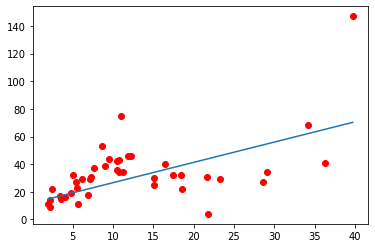

In [ ]:
plt.plot(Data[:,0], Data[:,1], 'ro', label='Original data')

predicted_y=np.zeros(0)
x_input=np.linspace(Data[:,0].min(),Data[:,0].max(),100)
for idx in range(x_input.shape[0]):
    predicted_val=model([x_input[idx]])
    predicted_y=np.append(predicted_y,predicted_val)
    
plt.plot(x_input,predicted_y, label='Fitted line')
#plt.legend()
plt.show()